<a href="https://colab.research.google.com/github/YOUbhrt/ENSIAS/blob/master/DL%20PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout, ZeroPadding2D, UpSampling2D
#from keras.layers.merge import _Merge
from keras.models import Model, Sequential
from keras import backend as K
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint 
from keras.utils import plot_model
from keras.initializers import RandomNormal
import keras
import cv2

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"younesbouhribat","key":"14db9210ac7edc3c5d4e52aefcabf378"}'}

In [5]:
!mkdir -p ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
!ls ~/.kaggle

kaggle.json


In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!kaggle datasets download  "nodoubttome/skin-cancer9-classesisic"

 99% 781M/786M [00:21<00:00, 31.8MB/s]
100% 786M/786M [00:21<00:00, 38.2MB/s]


In [10]:
!unzip skin-cancer9-classesisic.zip

Archive:  skin-cancer9-classesisic.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin cancer 

In [2]:
data_gen = ImageDataGenerator(preprocessing_function=lambda x: (x.astype('float32')) / 255)
x_train = data_gen.flow_from_directory("/content/Skin cancer ISIC The International Skin Imaging Collaboration"
                                        ,target_size = (256,256)
                                        ,batch_size = 64
                                        ,shuffle = True)


#print("Number of actinic keratosis training samples: %d"% len([iq for iq in os.scandir('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis')]))


Found 2357 images belonging to 2 classes.


In [3]:
# Number of Train pictures
DATADIR_Train = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
noOfFiles = 0
noOfDir = 0
for base, dirs, files in os.walk(DATADIR_Train):
    for directories in dirs:
        noOfDir += 1
    for Files in files:
        noOfFiles += 1
print('Number of files',noOfFiles)
print('Number of Directories',noOfDir)
print('Total:',(noOfDir + noOfFiles))

Number of files 2239
Number of Directories 9
Total: 2248


In [4]:
CATEGORIES  = list()
for root, dirs, files in os.walk(DATADIR_Train, topdown=False):
    for name in dirs:
        CATEGORIES.append(os.path.join(name))
print (CATEGORIES)

['basal cell carcinoma', 'seborrheic keratosis', 'nevus', 'melanoma', 'actinic keratosis', 'pigmented benign keratosis', 'squamous cell carcinoma', 'vascular lesion', 'dermatofibroma']


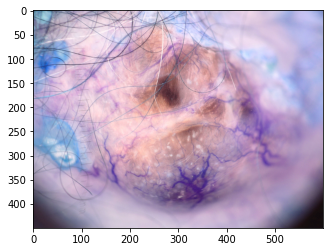

In [5]:
for category in CATEGORIES:
  path = os.path.join(DATADIR_Train, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(img_array)
    plt.show()
    break
  break

In [6]:
img_array.shape

(450, 600, 3)

In [62]:
#Train
train_data = []
def create_training_data():
    for category in CATEGORIES:
      path = os.path.join(DATADIR_Train, category)
      class_num = CATEGORIES.index(category)
      for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            train_data.append([img_array, class_num])
        except Exception as e:
            pass
create_training_data()


In [ ]:
random.shuffle(train_data)

In [63]:
len(train_data)

2239

In [64]:
X_Train = []
Y_Train = []
for features, label in train_data:
    X_Train.append(features)
    Y_Train.append(label)
len(X_Train), len(Y_Train)

(2239, 2239)

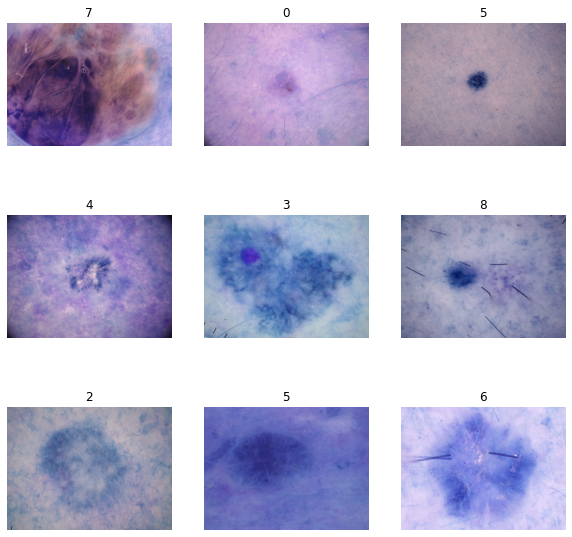

In [70]:
plt.figure(figsize=(10, 10))
i=1
import random 
for (img_array, class_num) in train_data:
    ax = plt.subplot(3, 3, i)
    i=i+1
    plt.imshow(img_array)
    plt.title(int(class_num))
    plt.axis("off")
    if i==10 :
      break

In [96]:
from sklearn.model_selection import train_test_split
X_Train, X_Val, Y_Train, Y_Val = train_test_split(X_Train, Y_Train, test_size=0.1, random_state=1)

In [101]:
print(len(Y_Val),len(X_Val))
print(len(Y_Train),len(X_Train))


152 152
1359 1359


# **Test**

---

# ---





In [38]:

# Number of Test pictures
DATADIR_Test = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test'
noOfFiles = 0
noOfDir = 0
for base, dirs, files in os.walk(DATADIR_Test):
    for directories in dirs:
        noOfDir += 1
    for Files in files:
        noOfFiles += 1
print('Number of files',noOfFiles)
print('Number of Directories',noOfDir)
print('Total:',(noOfDir + noOfFiles))

Number of files 118
Number of Directories 9
Total: 127


In [39]:
CATEGORIES_Test  = list()
for root, dirs, files in os.walk(DATADIR_Test, topdown=False):
    for name in dirs:
        CATEGORIES_Test.append(os.path.join(name))
print (CATEGORIES_Test)

['basal cell carcinoma', 'seborrheic keratosis', 'nevus', 'melanoma', 'actinic keratosis', 'pigmented benign keratosis', 'squamous cell carcinoma', 'vascular lesion', 'dermatofibroma']


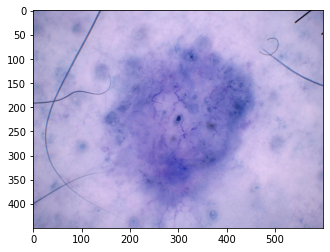

In [40]:
for category in CATEGORIES_Test:
  path = os.path.join(DATADIR_Test, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(img_array)
    plt.show()
    break
  break

In [49]:
img_array.shape

(450, 600, 3)

In [71]:
#Test
test_data = []
def create_testing_data():
    for category in CATEGORIES:
      path = os.path.join(DATADIR_Test, category)
      class_num = CATEGORIES.index(category)
      for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            test_data.append([img_array, class_num])
        except Exception as e:
            pass
create_testing_data()

In [76]:
random.shuffle(test_data)

In [77]:
len(test_data)

118

In [78]:
X_Test = []
Y_Test = []
for features, label in test_data:
    X_Test.append(features)
    Y_Test.append(label)
len(X_Test), len(Y_Test)

(118, 118)

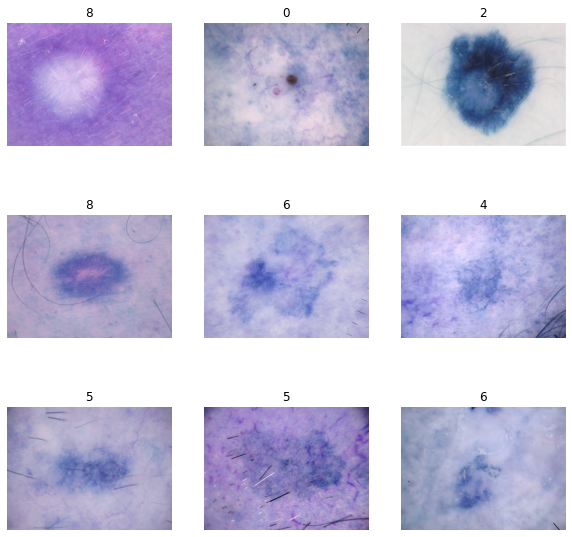

In [103]:
plt.figure(figsize=(10, 10))
i=1
import random 
for (img_array, class_num) in test_data:
    ax = plt.subplot(3, 3, i)
    i=i+1
    plt.imshow(img_array)
    plt.title(int(class_num))
    plt.axis("off")
    if i==10 :
      break


# **NORMALISATION**



In [116]:
X_Train[2]

array([[[241, 253, 255],
        [234, 244, 251],
        [250, 255, 255],
        ...,
        [250, 255, 253],
        [239, 248, 252],
        [243, 255, 255]],

       [[221, 230, 239],
        [ 13,  19,  24],
        [  0,   0,   0],
        ...,
        [  7,   8,   4],
        [ 10,  18,  18],
        [227, 238, 242]],

       [[250, 255, 255],
        [  0,   0,   0],
        [  5,   1,   0],
        ...,
        [  7,   5,   0],
        [  0,   1,   0],
        [250, 255, 255]],

       ...,

       [[253, 253, 255],
        [  0,   1,   5],
        [  2,   0,   1],
        ...,
        [  7,   0,   0],
        [ 14,   8,   9],
        [255, 254, 255]],

       [[240, 242, 250],
        [  0,   2,  10],
        [ 12,  13,  17],
        ...,
        [ 18,  11,  14],
        [  7,   1,   6],
        [248, 242, 247]],

       [[250, 252, 255],
        [250, 253, 255],
        [250, 253, 255],
        ...,
        [255, 253, 255],
        [255, 253, 255],
        [255, 253, 255]]